### Machine Learning: TF Audio Classification Data Pre-Processing Document
In this document we will read in our data set:
* read in all audio file and normalize their data
* visualize 6 random data in STFT, MFCC, Mel-Spectrogram
* Then perform feature extraction and cache as a NPY file for MFCC and Mel-Spectrogram.


In [1]:

# TODO: Take a look at https://github.com/harmanpreet93/audio_classification

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import helper

np.random.seed(42)

### Read in the dataset CSV
In this section we are looking for our data set file located on our desktop

In [2]:
# os path to desktop
#desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')

# folder directory as follows
"""

    root:
        kaggle_2018_dataset:
            train:
                wav files, and csv named catalog.csv
            data:
                npy files, feature extraction MFCC and MEL-SPEC

"""

dataset_root_dir = os.path.join("/home/charlesedwards/Documents", 'kaggle_2018_dataset')#dataset_root_dir = os.path.join(desktop_path, 'kaggle_2018_dataset')

# load the training data
dataset_train_folder = os.path.join(dataset_root_dir, 'train')
dataset_train_csv = os.path.join(dataset_train_folder, 'catalog.csv')

# load in our data_frame
data_frame = pd.read_csv(dataset_train_csv)
data_frame.drop(['license','freesound_id', 'manually_verified'], axis=1, inplace=True)
data_frame.head()


,fname,label
0,00044347.wav,Hi-hat
1,001ca53d.wav,Saxophone
2,002d256b.wav,Trumpet
3,0033e230.wav,Glockenspiel
4,00353774.wav,Cello


### Visualize the Audio Data
View the audio count per label distribution

<AxesSubplot:>

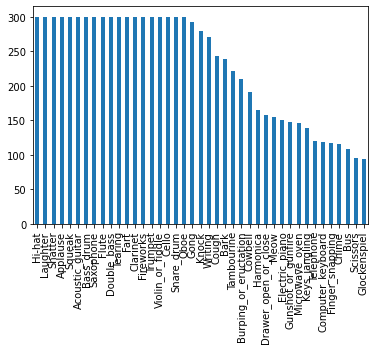

In [3]:
# visualize the label count distribution
data_frame['label'].value_counts().plot(kind='bar')

### Read Audio To Memory
This process will take a lot of ram and may vary on dataset size. Atm a 5GB dataset uses roughly 12GB of ram

In [4]:
import os

processed_data = []
sample_rates = []

# Windowing
n_fft=1024 #2048
hop_length=None#512

print(f"Processing audio from: {dataset_train_folder} ... with {len(data_frame)} files\nn_fft: {n_fft}\nhop_length: {hop_length}")

length = len(data_frame)
counter = 0

# using librosa for every fname in our data_frame generate a mel spectrogram and save it to a numpy array
for x, row in enumerate(data_frame.iloc):
    
    # load the audio file
    y, sr = librosa.load( os.path.join( dataset_train_folder, row[0] ), sr=None, duration=5) # we only want 5 seconds of every audio file

    # re sample the audio data to a lower sample rate
    #y_22k = librosa.resample(y, orig_sr=sr, target_sr=22050)

    # normalize the audio with librosa
    normalized_y = librosa.util.normalize(y)

    # append the data to our processed_data array
    processed_data.append(normalized_y)
    sample_rates.append(sr)

    # Notify update every N files
    if (counter == 500):
        print("Status: {}/{}".format(x+1, length))
        counter = 0

    counter += 1


print("done")

print("appending to processed_data as column 'data'")
# append the processed_data to the data frame as data
data_frame["data"] = processed_data
print("done")

print("appending to sample_rates as column 'sr'")
# append the sample_rates to the data frame as sr
data_frame["sr"] = sample_rates
print("done")


Processing audio from: /home/charlesedwards/Documents/kaggle_2018_dataset/train ... with 9473 files
n_fft: 1024
hop_length: None
Status: 501/9473
Status: 1001/9473
Status: 1501/9473
Status: 2001/9473
Status: 2501/9473
Status: 3001/9473
Status: 3501/9473
Status: 4001/9473
Status: 4501/9473
Status: 5001/9473
Status: 5501/9473
Status: 6001/9473
Status: 6501/9473
Status: 7001/9473
Status: 7501/9473
Status: 8001/9473
Status: 8501/9473
Status: 9001/9473
done
appending to processed_data as column 'data'
done
appending to sample_rates as column 'sr'
done


### Verify Audio Input
Let's see if the audio normalized audio data and sample rates are appended to the data frame

In [5]:
data_frame.head()

,fname,label,data,sr
0,00044347.wav,Hi-hat,"[0.00028638323, 0.00026962956, -0.00081691646,...",22050
1,001ca53d.wav,Saxophone,"[-0.0016872773, -0.0025404168, -0.0024376984, ...",22050
2,002d256b.wav,Trumpet,"[-9.1841066e-05, -0.0015498181, -0.0022558463,...",22050
3,0033e230.wav,Glockenspiel,"[-0.002800799, 0.002664138, -0.0056502987, 0.0...",22050
4,00353774.wav,Cello,"[-0.00983727, -0.013821629, -0.011418988, -0.0...",22050


### Data Visualization 1/3
Visualize the data, in this section generate **STFT** spectrograms to db/log scale

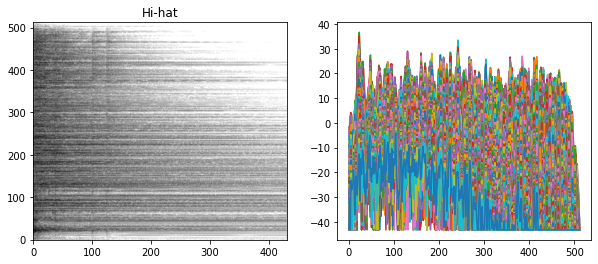

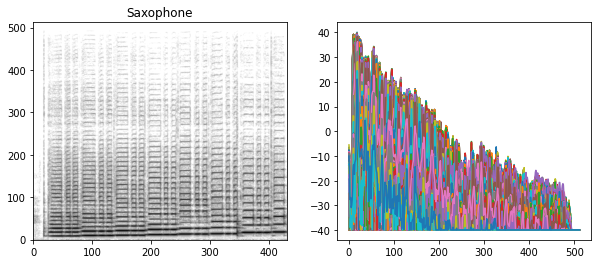

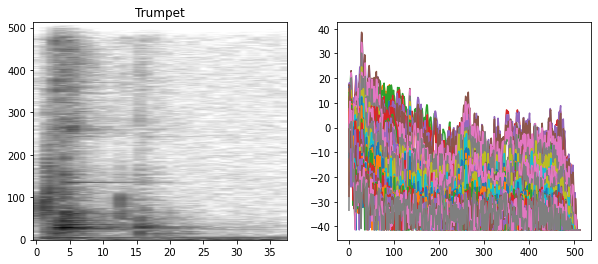

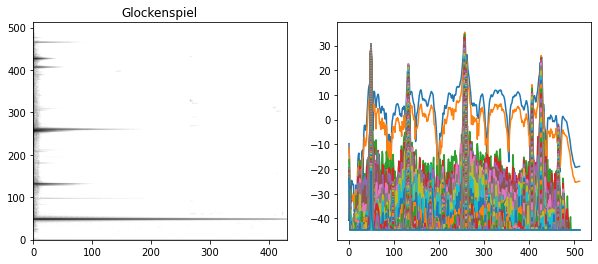

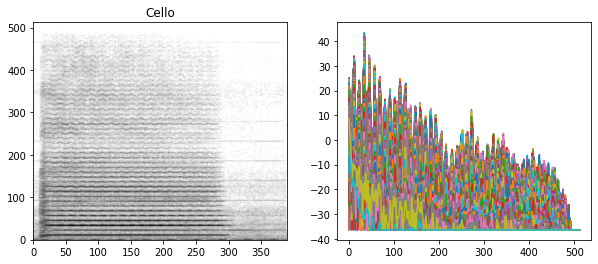

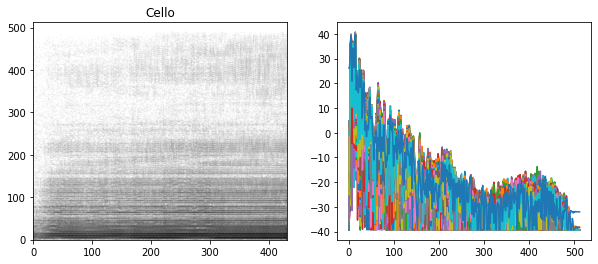

In [6]:
# display 6 random spectrograms
for i in range(6):

    # compute a short-time Fourier transform (STFT)
    D = librosa.stft(data_frame.iloc[i]['data'], n_fft=n_fft, hop_length=hop_length)
    # convert to db
    D_db = librosa.amplitude_to_db(np.abs(D))

    # display the spectrogram and data side by side
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(D_db, aspect='auto', origin='lower', cmap='gray_r')
    plt.title(data_frame.iloc[i]['label'])
    plt.subplot(1, 2, 2)
    plt.plot(D_db)
    plt.show()


### Data Visualization 2/3
Display 6 audio **MFCCs** of the data,
Mel-frequency cepstral coefficients

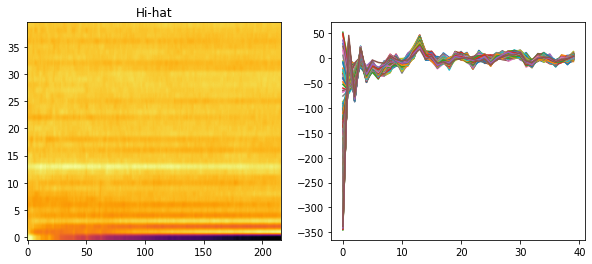

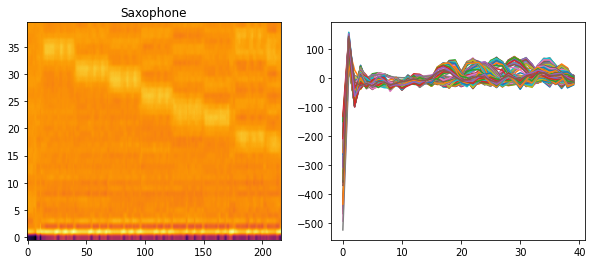

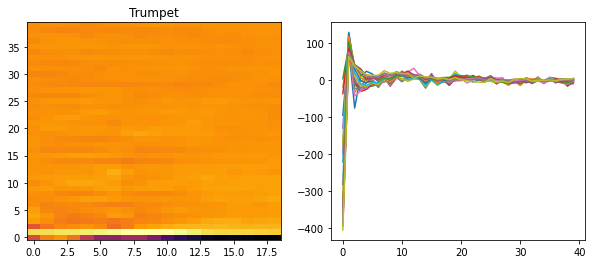

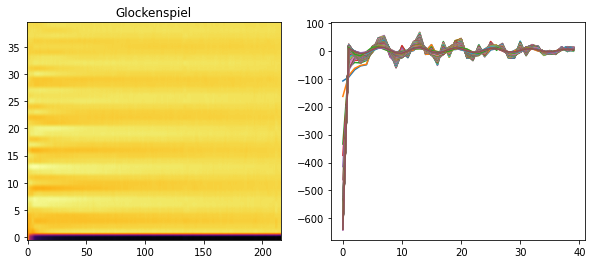

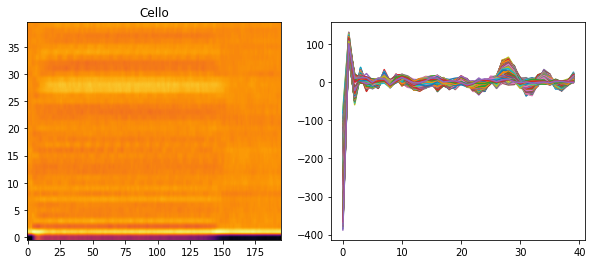

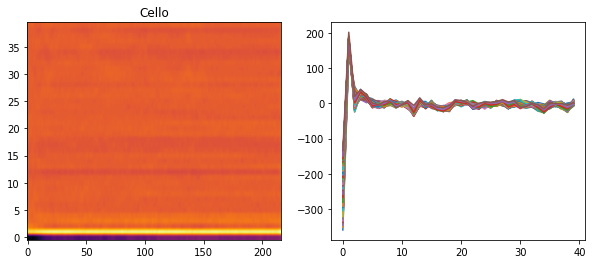

In [7]:
#import librosa.display

# display 6 random MFCCS
for i in range(6):

    mfcc = librosa.feature.mfcc(data_frame.iloc[i]['data'], sr=data_frame.iloc[i]['sr'], n_mfcc=40)

    # display the spectrogram and data side by side
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(mfcc, aspect='auto', origin='lower', cmap="inferno")
    plt.title(data_frame.iloc[i]['label'])
    plt.subplot(1, 2, 2)
    plt.plot(mfcc)
    plt.show()

### Data Visualization 3/3
Display 6 audio **MEL-Spectrogram** of the data

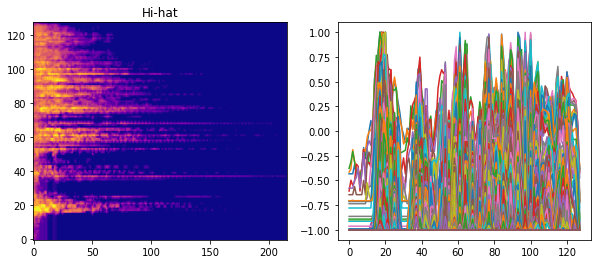

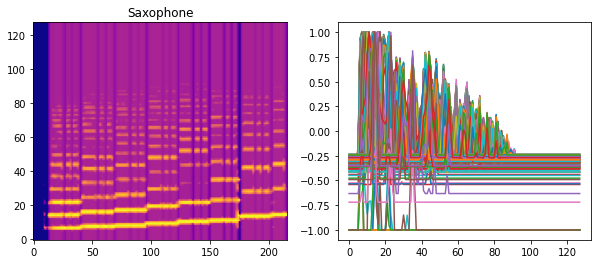

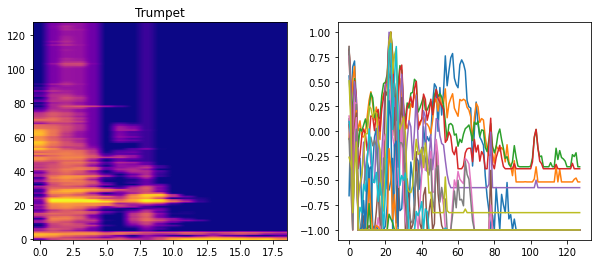

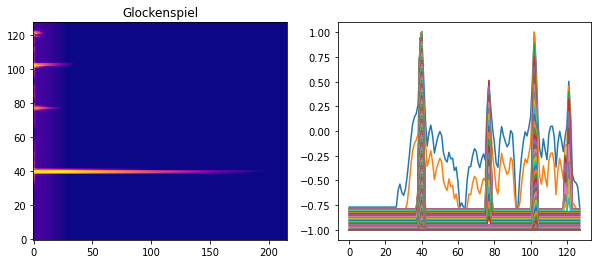

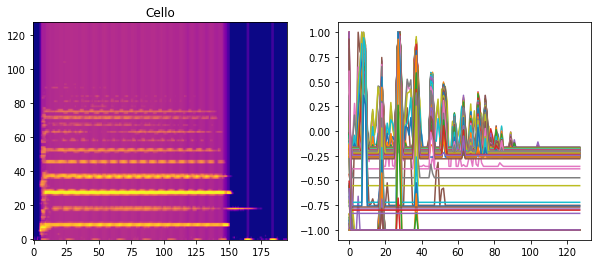

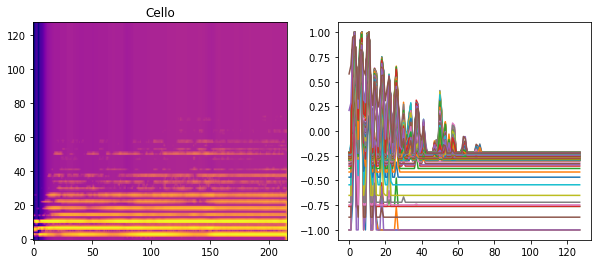

In [8]:
# create MEL-scaled filter banks spectrograms
n_mels = 128

# display 6 random mel spectrograms
for i in range(6):

    # generate a mel scaled spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(data_frame.iloc[i]['data'], sr=data_frame.iloc[i]['sr'], n_mels=n_mels)

    # convert the sound intensity to log scale
    mel_db = librosa.amplitude_to_db(np.abs(mel_spectrogram))

    # normalize the data to 0-1
    normalized_mel = librosa.util.normalize(mel_db)

    # plot the spectrogram and data side by side
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(normalized_mel, aspect='auto', origin='lower', cmap='plasma')
    plt.title(data_frame.iloc[i]['label'])
    plt.subplot(1, 2, 2)
    plt.plot(normalized_mel)
    plt.show()


### Feature Extraction of MFCCs and Mel-Spectrograms
In this segment we will now extract the features of the MFCCs and the Mel-Spectrograms

In [9]:
# Iterate through all audio files and extract MFCC
features = []
labels = []
frames_max = 0
counter = 0
total_samples = len(data_frame)
n_mfcc = 40
mfcc_max_padding = 0

for index, row in data_frame.iterrows():
    class_label = row["label"]

    # Extract MFCC data
    mfcc = librosa.feature.mfcc(row['data'], sr=row['sr'], n_mfcc=40)
    
    # normalize the mfcc between -1 and 1
    normalized_mfcc = librosa.util.normalize(mfcc)

    # Should we require padding
    shape = normalized_mfcc.shape[1]
    if (mfcc_max_padding > 0 & shape < mfcc_max_padding):
        xDiff = mfcc_max_padding - shape
        xLeft = xDiff//2
        xRight = xDiff-xLeft
        normalized_mfcc = np.pad(normalized_mfcc, pad_width=((0,0), (xLeft, xRight)), mode='constant')

    # Save current frame count
    num_frames = normalized_mfcc.shape[1]
    
    # Add row (feature / label)
    features.append(normalized_mfcc)
    labels.append(class_label)

    # Update frames maximum
    if (num_frames > frames_max):
        frames_max = num_frames

    # Notify update every N files
    if (counter == 500):
        print("Status: {}/{}".format(index+1, total_samples))
        counter = 0

    counter += 1
    
print("Finished: {}/{}".format(index, total_samples))

Status: 501/9473
Status: 1001/9473
Status: 1501/9473
Status: 2001/9473
Status: 2501/9473
Status: 3001/9473
Status: 3501/9473
Status: 4001/9473
Status: 4501/9473
Status: 5001/9473
Status: 5501/9473
Status: 6001/9473
Status: 6501/9473
Status: 7001/9473
Status: 7501/9473
Status: 8001/9473
Status: 8501/9473
Status: 9001/9473
Finished: 9472/9473


In [10]:
# Add padding to features with less than frames than frames_max
padded_features = helper.add_padding(features, frames_max)

In [11]:
# Verify shapes
print("Raw features length: {}".format(len(features)))
print("Padded features length: {}".format(len(padded_features)))
print("Feature labels length: {}".format(len(labels)))

Raw features length: 9473
Padded features length: 9473
Feature labels length: 9473


### Save MFCC Features

In [12]:
# Convert features (X) and labels (y) to Numpy arrays
X = np.array(padded_features)
y = np.array(labels)

data_npy_folder = os.path.join(dataset_root_dir, 'data')

# Optionally save the features to disk
np.save( os.path.join(data_npy_folder, "X-mfcc" ), X)
np.save( os.path.join(data_npy_folder, "y-mfcc" ), y)

# free up memory
del X
del y
del features
del labels

In [13]:
# Iterate through all audio files and extract mel spectrograms
features = []
labels = []
frames_max = 0
counter = 0
total_samples = len(data_frame)
n_mels=40
mfcc_max_padding = 0

for index, row in data_frame.iterrows():
    class_label = row["label"]

    # generate a mel scaled spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(row['data'], sr=row['sr'], n_mels=n_mels)

    # convert the sound intensity to log scale
    mel_db = librosa.amplitude_to_db(np.abs(mel_spectrogram))

    # normalize the data to 0-1
    normalized_mel = librosa.util.normalize(mel_db)

    # Should we require padding
    shape = normalized_mel.shape[1]
    if (mfcc_max_padding > 0 & shape < mfcc_max_padding):
        xDiff = mfcc_max_padding - shape
        xLeft = xDiff//2
        xRight = xDiff-xLeft
        normalized_mel = np.pad(normalized_mel, pad_width=((0,0), (xLeft, xRight)), mode='constant')

    # Save current frame count
    num_frames = normalized_mel.shape[1]
    
    # Add row (feature / label)
    features.append(normalized_mel)
    labels.append(class_label)

    # Update frames maximum
    if (num_frames > frames_max):
        frames_max = num_frames

    # Notify update every N files
    if (counter == 500):
        print("Status: {}/{}".format(index+1, total_samples))
        counter = 0

    counter += 1
    
print("Finished: {}/{}".format(index, total_samples))

Status: 501/9473
Status: 1001/9473
Status: 1501/9473
Status: 2001/9473
Status: 2501/9473
Status: 3001/9473
Status: 3501/9473
Status: 4001/9473
Status: 4501/9473
Status: 5001/9473
Status: 5501/9473
Status: 6001/9473
Status: 6501/9473
Status: 7001/9473
Status: 7501/9473
Status: 8001/9473
Status: 8501/9473
Status: 9001/9473
Finished: 9472/9473


In [14]:
# Add padding to features with less than frames than frames_max
padded_features = helper.add_padding(features, frames_max)

In [15]:
# Verify shapes
print("Raw features length: {}".format(len(features)))
print("Padded features length: {}".format(len(padded_features)))
print("Feature labels length: {}".format(len(labels)))

Raw features length: 9473
Padded features length: 9473
Feature labels length: 9473


In [16]:
# Convert features (X) and labels (y) to Numpy arrays
X = np.array(padded_features)
y = np.array(labels)

data_npy_folder = os.path.join(dataset_root_dir, 'data')

# Optionally save the features to disk
np.save( os.path.join(data_npy_folder, "X-mel-spec" ), X)
np.save( os.path.join(data_npy_folder, "y-mel-spec" ), y)

# free up memory
del X
del y
del features
del labels

In [17]:

# CNNmodel = tf.keras.models.Sequential()
# CNNmodel.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 1206, 1)))
# CNNmodel.add(tf.keras.layers.MaxPooling2D((2, 2)))
# CNNmodel.add(tf.keras.layers.Flatten())
# CNNmodel.add(tf.keras.layers.Dense(32, activation='relu'))
# CNNmodel.add(tf.keras.layers.Dense(24, activation='softmax'))

# # Instantiate the `tf.keras.layers.Normalization` layer.
# norm_layer = tf.keras.layers.Normalization()
# # Fit the state of the layer to the spectrograms
# # with `Normalization.adapt`.
# norm_layer.adapt(data=data_frame.iloc[0]['data'])

# # construct our model
# CNNmodel = tf.keras.Sequential(
#     [
#         tf.keras.layers.Input(shape=(128, 1206, 3)), # set the input shape to the shape of the spectrogram
#         tf.keras.layers.Resizing(32, 32), # Downsample the input. ?? why????
#         norm_layer, # Normalize the input. why????
#         tf.keras.layers.Conv2D(32, 3, activation='relu'),
#         tf.keras.layers.Conv2D(64, 3, activation='relu'),
#         tf.keras.layers.MaxPooling2D(),
#         tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(label_length),
#         # #tf.keras.layers.Normalization(axis=-1, input_shape=spectrogram_shape), # Normalize the input.
#         # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#         # tf.keras.layers.MaxPooling2D((2, 2)),
#         # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#         # tf.keras.layers.MaxPooling2D((2, 2)),
#         # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     ]    
# ) 


In [18]:
# look at this because it shows good examples of normalizing audio data
https://github.com/GorillaBus/urban-audio-classifier/blob/master/2-pre-processing.ipynb

SyntaxError: invalid syntax (3677640776.py, line 2)